In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [2]:
file_path = 'Downloads/BostonHousing.csv' 
df = pd.read_csv(file_path)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
train_data=pd.read_csv("Downloads/BostonHousing.csv")

In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
target = df['medv']

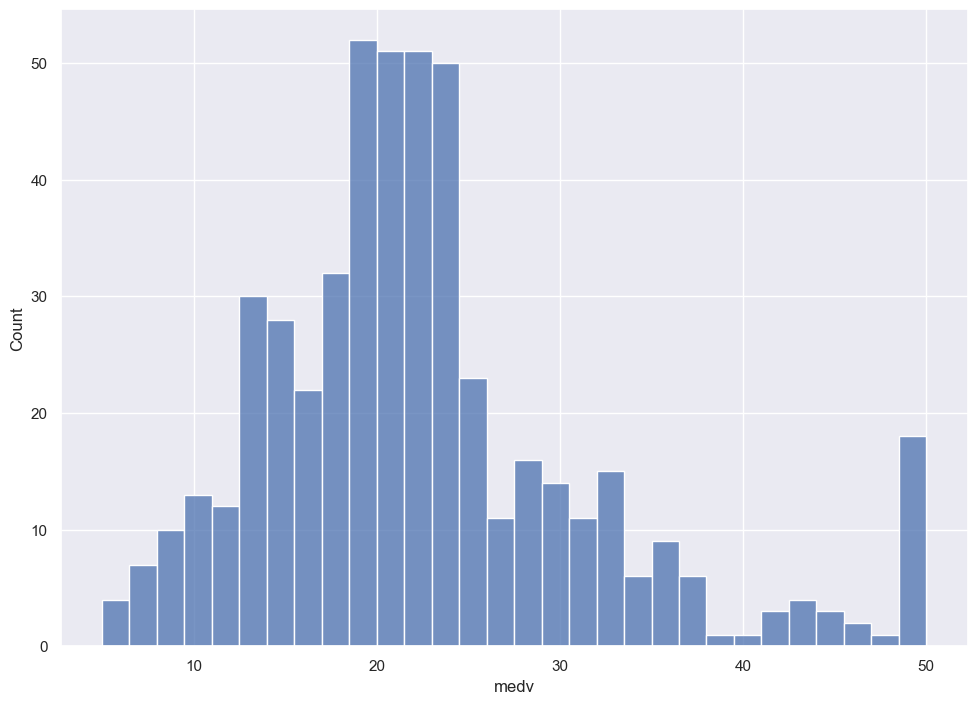

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['medv'], bins=30)
plt.show()

In [7]:
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

<Axes: >

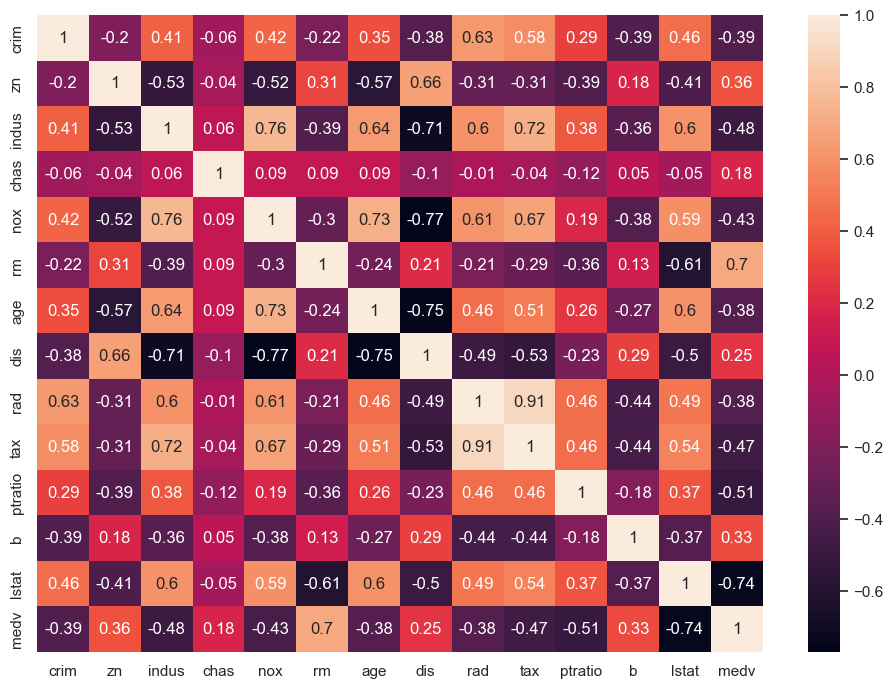

In [8]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

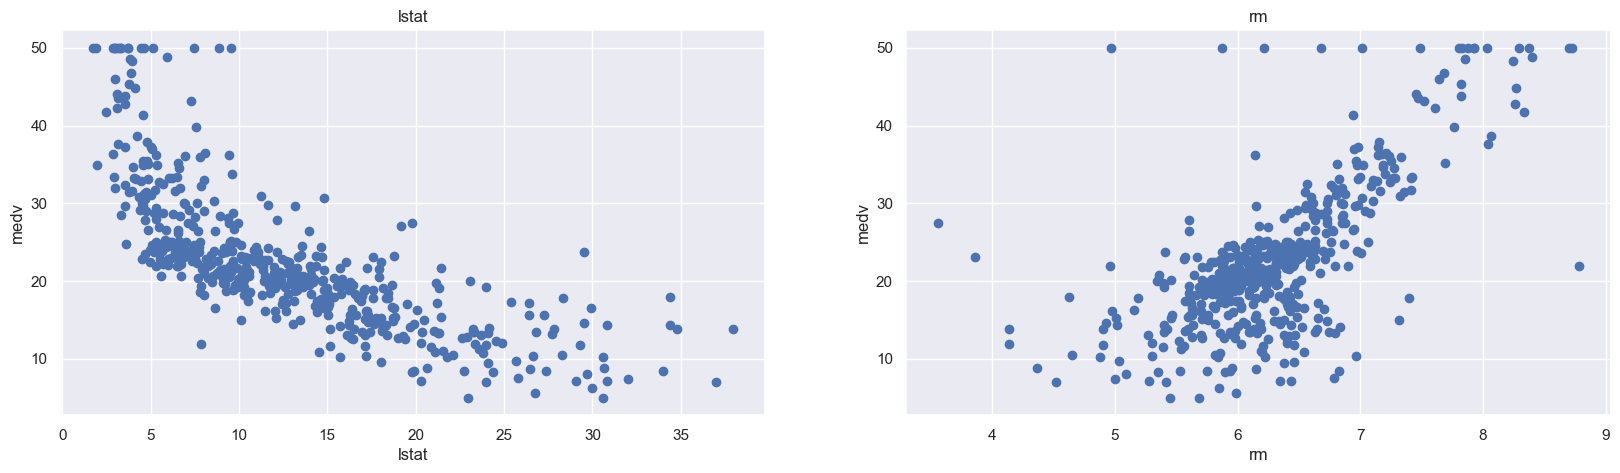

In [9]:
plt.figure(figsize=(20, 5))
features = ['lstat', 'rm']
target = df['medv']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [10]:
import torch
torch.cuda.is_available()

False

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
features = ['lstat', 'rm']
target = 'medv'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"mae: {mae:.2f}")

Mean Squared Error (MSE): 5.59
R-squared (R2): 0.57
mae: 3.90


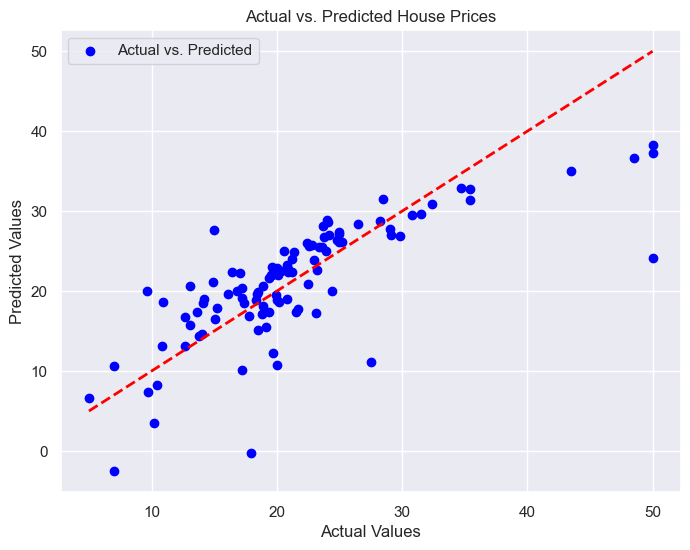

In [12]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted House Prices')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

Mean Squared Error: 5.657855148330725
Feature Coefficients:
lstat: -0.8128411609287973
rm: 1.9881051376870276


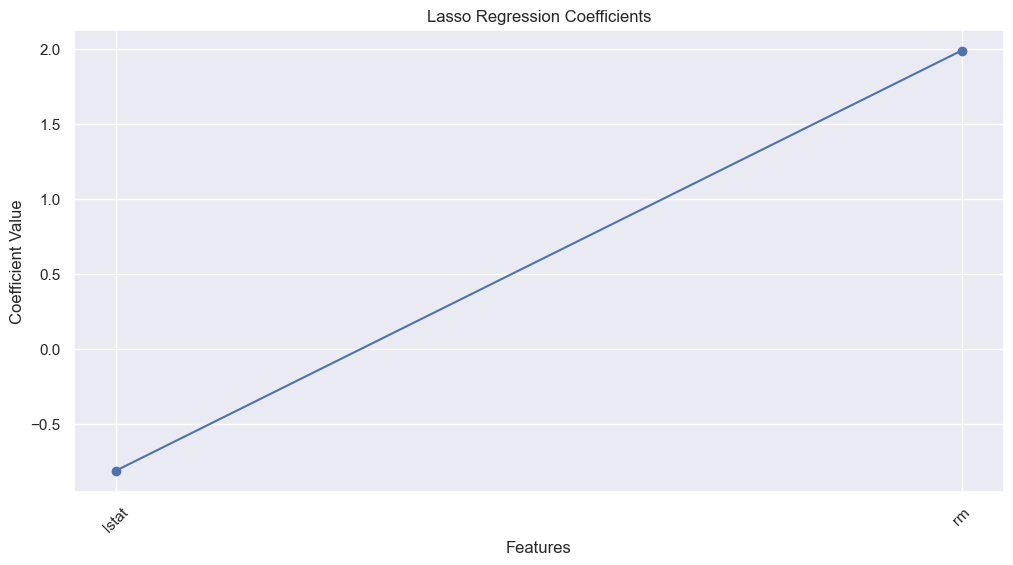

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
features = ['lstat', 'rm']
target = 'medv'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
lasso = Lasso(alpha=1.0) 
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")
coefficients = lasso.coef_
print("Feature Coefficients:")
for feature, coef in zip(df[features], coefficients):
    print(f"{feature}: {coef}")
plt.figure(figsize=(12, 6))
plt.plot(range(len(coefficients)), coefficients, marker='o', linestyle='-', color='b')
plt.xticks(range(len(coefficients)), df[features], rotation=45)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
features = ['lstat', 'rm']
target = 'medv'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = RandomForestRegressor(random_state=1,n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"mae: {mae:.2f}")

Mean Squared Error (MSE): 4.52
R-squared (R2): 0.79
mae: 3.18
